# 도커 소개

- 리눅스 컨테이너에 여러 기능을 추가함으로써 애플리케이션을 컨테이너로써 좀 더 쉽게 사용 할 수 있게 만들어진 오픈소스 프로젝트
- Go 언어로 작성되어 있음

###  배경
- 기존 가상화 기술은 하이퍼바이저를 이용해 여러 개의 운영체제를 하나의 호스트에서 생성해 사용하는 방식
- 하이퍼바이저에 의해 생성되고 관리되는 운영체제는 게스트 운영체제(Guest OS)라고 함
- 각 게스트 운영체제는 다른 게스트 운영체제와는 완전히 독립된 공간과 시스템 자원을 할당받아 사용함
- 가상화 방식을 사용할 수 있는 대표적인 가상화 툴 : VirtualBox, VMWare

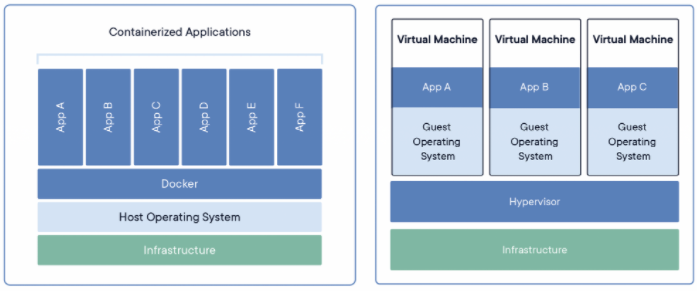

- 단점
 - 하이퍼바이저가 각종 시스템 자원을 가상화하고 독립된공간을 생성하는 작업을 해야 함
   - 성능 손실
 - 가상머신은 게스트 운영체제를 사용하기 위한 라이브러리, 커널 등을 전부 포함해야 함
   - 가상 머신을 배포하기 위한 이미지로 만들었을 때 이미지 크기 커짐 (수 기가바이트에 달할 수 있음)

### 도커 컨테이너 등장
- 장점
 - 가상화된 공간을 생성하기 위해 리눅스 자체 기능인 chroot, namespace, cgroup 을 사용
   - 프로세스 단위의 격리 환경 구축
   - 성능 손실 거의 없음
 - 컨테이너에 필요한 커널은 호스트의 커널을 공유하여 사용
 - 컨테이너 안에는 애플리케이션을 구동하는 데 필요한 라이브러리 및 실행 파일만 존재
   - 이미지 용량 또한 가상 머신에 비해 대폭 줄어듦
   
   
### 도커를 시작해야 하는 이유
#### 1. 애플리케이션의 개발과 배포가 편해짐
  - 도커 컨테이너는 호스트 OS 위에서 실행되는 격리된 공간
    - 호스트 OS : 서버를 부팅할 때 실행되는 운영체제
  - 컨테이너 자체에 특별한 권한을 주지 않는 한, 컨테이너 내부에서 수많은 소프트웨어를 설치하고 설정 파일을 수정해도 호스트 OS 에는 영향을 끼치지 않음
    - 독립된 개발 환경 보장
  - 도커 이미지는 가상 머신의 이미지와는 달리 커널을 포함하고 있지 않음
    - 이미지 크기 감소
  - 이미지 내용을 레이어 단위로 구성하며, 중복되는 레이어를 재사용 할 수 있음
    - 애플리케이션 배포 속도 증가
#### 2. 여러 애플리케이션의 독립성과 확장성이 높아짐
  - 컨테이너 기반의 마이크로 서비스 가능
    - 도커 스웜 모드, 쿠버네티스 등의 컨테이너 오케스트레이션 플랫폼을 통해 사용
    
### 도커 엔진 설치
- 도커는 다양한 운영체제에서 사용 가능
  - but, 리눅스에서 작동하는데 최적화 되어 있음
- 리눅스 컨테이너를 제어하는 API를 Go 언어로 구현한 libcontainer 를 사용하기 때문에 대부분의 리눅스 운영체제에서 사용 가능
- 도커를 사용할 때 쓰는 대표적인 리눅스 운영체제 : CoreOS, CentOS, 우분투
- 지원이 중단되지 않은 최신 버전의 운영체제 배포판을 사용하는 것이 좋음
  - 윈도우 10, 맥 OS X 10.10.3 Yosemite 이전 버전의 운영체제를 사용한다면 도커를 사용하기 위해 가상화 공간을 별도로 생성해야 함

#### 도커 엔진의 종류 및 버전
  - 2017년 3월부터 도커 엔진은 도커 EE(Docker Enterprise Edition), 도커 CE(Community Edition)으로 구분되어 제공
    - 버전 이름 : 17.03-EE 또는 17.03-CE 와 같이 (출시 년도)-(출시 월)-(도커 엔진 종류)의 형태
  - 도커 EE
    - 유료로 제공되는 기업용 솔루션
    - 각종 기술 지원 및 실제 서비스 단계에서 필요한 각종 부가 기능들을 도커 엔진과 함께 제공
    - 3개월마다 안정화된 버전으로 릴리즈됨
  - 도커 CE
    - 무료로 제공되는 도커 엔진
    - 별도의 기술 지원 및 서비스를 제공하지는 않지만, 도커 엔진 자체의 핵심적인 기능을 무료로 사용 가능
    - stable과 edge 버전으로 구분해 각각 3개월, 1개월 단위로 릴리즈됨 (edge 는 각종 버그가 발생할 수 있으므로 stable 버전 지향)
    
#### 리눅스 도커 엔진 설치
  - 최신 버전 커널을 사용하고 있는지 확인
    - 호스트 운영체제가 최소 3.10 버전 이상을 사용해야 도커 컨테이너를 정상적으로 사용 가능
    - 터미널에서 uname -r 명령어 입력하여 커널 버전이 이를 만족하는지 확인
    ```bash
    $ uname -r
    ```
  - 지원 기간 내에 있는 배포판인지 확인
  - 64비트 리눅스인지 확인
    - 도커는 64비트에 최적화 되어 있음
  - sudo 명령어를 통해 설치하거나 root 권한을 소유한 계정에서 설치를 진행
  - 원래는 윈도우와 맥 OS X 에서 도커를 사용하려면 도커 툴박스(Docker Toolbox)라는 패키지를 설치해야 했음
    - 도커 툴박스는 오라클 버추얼박스(VirtualBox)의 가상화 기술을 이용해 리눅스 가상 환경을 구축한 뒤 도커를 설치함
    
#### Docker for Windows, Docker for Mac
  - 가상 머신을 생성하지 않고, 자체 가상화 기술로 리눅스 환경을 만들어 컨테이너를 생성함
    - 가상 환경을 생성하기 위해 리눅스킷(Linuxkit) 툴 이용
    - 리눅스킷은 최소화된 리눅스 커널만을 탑재한 뒤 필요한 작업만 컨테이너 기반의 서비스로 정의해 사용
    - Docker for Mac, Docker for Windows의 커널은 리눅스킷의 커널을 따르게 됨 (도커 엔진 또한 해당 커널 사용)
  - 도커에서 컨테이너를 생성할 때는 포트 포워딩을 설정하는 것만으로 외부에서 컨테이너에 접근 할 수 있음

### 도커 이미지와 컨테이너
#### 도커 이미지
  - 가상 머신을 생성할 때 사용하는 iso 파일과 비슷한 개념
  - 이미지는 여러 개의 계층으로 된 바이너리 파일로 존재함
  - 컨테이너를 생성하고 실행할 때 읽기 전용으로 사용됨
  - 이미지는 도커 명령어로 내려받을 수 있으므로 별도로 설치할 필요 없음
  - 형태 : [저장소 이름]/[이미지 이름]:[태그]
#### 도커 컨테이너
  - 해당 이미지의 목적에 맞는 파일이 들어있는 파일시스템과 격리된 시스템 자원 및 네트워크를 사용 할 수 있는 독립적인 공간이 생성됨
  - 컨테이너는 이미지를 읽기 전용으로 사용
  - 생성된 컨테이너는 각기 독립된 파일시스템을 제공받음
  - 호스트와 분리돼 있으므로 특정 컨테이너에서 어떤 애플리케이션을 설치하거나 삭제해도 다른 컨테이너와 호스트는 변화가 없음
  - 하나의 컨테이너에 프로세스 하나만 실행하는 것이 도커의 철학

### 도커 명령어
```
[컨테이너 실행]
$ docker run -it ubuntu:14.04 (컨테이너 실행 및 bash 접속)
$ docker create --name mycentos centos:7 (컨테이너 생성)
$ docker start mycentos (컨테이너 시작)
$ docker attach mycentos (컨테이너 내부 접속)
$ docker exec -it mycentos /bin/bash (exec: 컨테이너 내부에서 명령어 실행한 뒤 그 결과값을 반환)

run 명령어 : docker pull(이미지 없는 경우) > docker create > docker start > docker attach(-i, -t 옵션 활성화 시)
create 명령어 : docker pull(이미지 없는 경우) > docker create

[컨테이너, 이미지, 볼륨 등 도커의 모든 구성 단위의 정보 확인]
$ docker inspect
$ docker inspect --type volume myvolume (myvolume 볼륨에 대한 정보 조회)
$ docker container inspect (도커 컨테이너 정보 조회)
$ docker image inspect (도커 이미지 정보 조회)
$ docker volume inspect (도커 볼륨 정보 조회)

[컨테이너 목록 확인]
$ docker ps (정지되지 않은 컨테이너만 출력)
$ docker ps -a (모든 컨테이너 출력)
$ docker ps --format "table {{.ID}}\t{{.Status}}\t{{.Image}}\t{{.Names}}" (원하는 정보만 출력)

[컨테이너 이름 변경]
$ docker rename container_a container_b

[컨테이너 삭제]
$ docker stop container_b
$ docker rm container_b (실행 중인 컨테이너는 삭제할 수 없음)
$ docker rm -f container_b (실행 중인 컨테이너 강제 삭제)
$ docker container prune (모든 컨테이너 삭제)
$ docker stop $(docker ps -a -q) (-q: 컨테이너 ID 만 출력)
$ docker rm $(docker ps -a -q)

[호스트와 바인딩된 포트 확인]
$ docker port container_a

[호스트 볼륨 공유]
$ docker run -d --name wordpressdb -e MYSQL_ROOT_PASSWORD=password -e MYSQL_DATABASE=wordpress -v /home/wordpress_db:/var/lib/mysql mysql:5.7 (/var/lib/mysql : MYSQL 이 데이터를 저장하는 기본 디렉터리)
$ docker run -it --name volumes_from_container --volumes-from wordpressdb ubuntu:14.04

[볼륨 생성]
$ docker volume create --name myvolume (볼륨은 로컬 호스트에 저장되며, 도커 엔진에 의해 생성되고 삭제될 수 있음)
$ docker run -it --name volume_auto -v /root (공유할 디렉터리 위치를 -v 옵션에 입력하면 해당 디렉터리에 대한 볼륨을 자동으로 생성함)

[볼륨 조회]
$ docker volume ls

[생성한 볼륨을 컨테이너에 마운트]
$ docker run -it name myvolume_1 -v myvolume:/root/
$ docker run -it name myvolume_2 -v myvolume:/root/
-> myvolume_1, myvolume_2 모두 /root/ 디렉터리를 공유한다.

[사용되지 않는 볼륨 삭제]
$ docker volume prune


[옵션]
-i: 상호 입출력
-t: tty 활성화
--link: 내부 IP를 알 필요 없이 항상 컨테이너에 별명(alias)으로 접근하도록 설정 / 실행순서의 의존성 정의 (deprecated 됨 -> 브리지 네트워크 권장)
-v : 볼륨 공유
--volumes-from : 볼륨 컨테이너에 연결해 데이터를 간접적으로 공유받음
```

### 컨테이너 외부 노출
- 컨테이너는 가상 머신과 마찬가지로 가상 IP 주소를 할당받음
- 기본적으로 도커는 컨테이너에 172.17.0.x의 IP 를 순차적으로 할당함
- 컨테이너 bash 접속 이후, `ifconfig` 명령어로 컨테이너의 네트워크 인터페이스 확인
- 아무런 설정을 하지 않으면, 컨테이너는 외부에서 접근할 수 없으며, 도커가 설치된 호스트에서만 접근 가능
- 외부에 컨테이너 애플리케이션을 노출하기 위해서는 eth0의 IP와 포트를 호스트의 IP와 포트에 바인딩해야 함
```
$ docker run -it --name mywebserver -p 80:80 ubuntu:14.04 (컨테이너에 아파치 웹서버를 설치해 외부에 노출)
```
